In [35]:
import numpy as np
import sys
import matplotlib.pyplot as plt

* rewards[s+a], rewards[s-a] are immediate rewards.
* V[s+a], V[s-a] are values of the next states.
* This is the core of the Bellman equation: The expected value of your action is the sum of immediate rewards and the value of the next state.

In [61]:
def value_iteration_for_gamblers(p_h, theta=1e-5, discount_factor=1):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """

    rewards = np.zeros(101)
    rewards[100] = 1 
    V = np.zeros(101)
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.      
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        for a in stakes:
            win_reward = rewards[s+a]; win_next_state_val = V[s+a]
            lose_reward = rewards[s-a]; lose_next_state_val = V[s-a]
            A[a] = p_h * (win_reward + win_next_state_val*discount_factor) + \
                    (1-p_h) * (lose_reward + lose_next_state_val*discount_factor)
        return A
    
    while True:
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(1, 100):
            A = one_step_lookahead(s, V, rewards)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))   # Calculate delta across all states seen so far
            V[s] = best_action_value        
        if delta < theta:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros(100)
    for s in range(1, 100):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V, rewards)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s] = best_action    
    return policy, V

policy, v = value_iteration_for_gamblers(0.25)

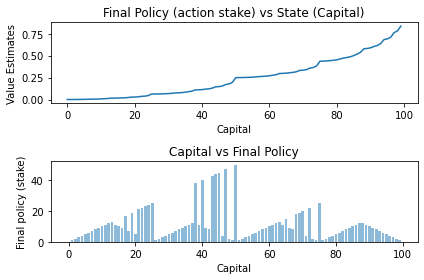

In [62]:
fig, axes = plt.subplots(2,1); ax = axes.ravel(); 
x = range(100)
ax[0].plot(x, v[:100])
ax[0].set_xlabel('Capital'); ax[0].set_ylabel('Value Estimates')
ax[0].set_title('Final Policy (action stake) vs State (Capital)')

ax[1].bar(x, policy, align='center', alpha=0.5)
ax[1].set_xlabel('Capital'); ax[1].set_ylabel('Final policy (stake)')
ax[1].set_title('Capital vs Final Policy')
fig.tight_layout()